# Word frequency in _The Machine Stops_ by E.M. Forster

## Before we start

Before we start, we need to install a new library and download some files to support it. Run the following cell, and a few moments later you should see the 'NLTK Downloader' window pop up. Select 'book' and click download. It will take a couple of minutes to download while you follow the next couple of steps, but you will need to check it has finished and close the window before you can run cells in your notebook again.

In [3]:
import nltk
# nltk.download()

## Getting the text

![](http://ia800501.us.archive.org/15/items/LibrivoxCdCoverArt10/Machine_Stops_1108.jpg)

The exercise in this notebook is based on the short story "The Machine Stops" (1909) by E.M. Forster, and the article ["Where the Machine Stops: Software as Reader and the Rise of New Literatures"](http://canterbury.summon.serialssolutions.com/#!/search?bookMark=ePnHCXMwXV09C8IwFCzSQe1_kAfOhbb5aOMqioMu1cGtpGkCQkExgn_fS60dnPPIknD3jnfcW0YxdKudhWEuZ2nBeBUPyYgcmqe8zif7hVLFIqr3IXJgQ0CepyW0PHQaPISWzq_7w2_oDDB6a5xpT_Vg7iUo7KGyvnlLd0dAAzpOGcQ-iS773WV7SMdlAukDnJZ20mjhXNYpyQWzHMSbuVIaMJax4FjbAjG0zFoJyNbadS2EkzFhjKeEM5ol0fp77Q-xm_GxfZNLEfqaSoWdR6u_qq7vGwbVU-Gni5x9ABKuUmM) (2015) by Tom Lynch. Lynch uses [Voyant Tools](http://voyant-tools.org/) to visualise a word frequency list for "The Machine Stops". We're going to reproduce his approach using Python and Jupyter notebooks, as well as explore some discourse analysis tools from the Natural Language Tool Kit (NLTK).

First we need to get a copy of the text. Hopefully you've read it already. We'll use the wikisource text here: https://en.wikisource.org/wiki/The_Machine_Stops You can access it in the IFrame below (IFrames are a handy way to embed other web pages into your notebooks).

- To download the file in a text format, go to the 'Choose Format' link under the section headed 'Download/Print' on the left sidebar. 
- This will take you to a form where you can enter the page title ('The_Machine_Stops') and select 'txt' for the file format. Do not include fonts. 
- Save the downloaded file in the same directory as this notebook. It should appear in your list of files in the 'Home' tab in your browser.

In [1]:
from IPython.display import IFrame
IFrame('https://en.wikisource.org/wiki/The_Machine_Stops', width=1000, height=800)

Now let's take a look at the text. 

We could open the file in a separate text editor (such as TextWrangler on a Mac), but it's useful to know about the notebook's magic commands:

In [2]:
%less The_Machine_Stops.txt

As you can see in the next cell, the file has some material like title, contents, and license statement that we don't want to include in our word counts. Before we continue, 
- Go to the 'Home' tab in your browser
- open 'The_Machine_Stops.txt' and remove everything before the first chapter title ('The Air Ship').  
- Also remove the extra material from the end of the story.  
- Go to File > Save to make sure your changes are saved.
- Once back in your notebook, use ```%less The_Machine_Stops.txt``` again to confirm your edits look right

### Tokenisation

Great - you now have your text available. However, before we can count terms appearing in the text, we need to convert it to a more convenient structure. In Natural Language Processing parlance, this is called 'tokenisation'. We'll create a list of tokens using a Python list.

In [9]:
with open('The_Machine_Stops.txt') as f:
    text = f.read()
    word_list = []
    for word in text.split():
        word_list.append(word)

The ```with``` keyword is useful for opening files, as it automatically closes the file afterwards for us. Here, the text file gets opened, and assigned to a variable 'f' - a convention for 'file'. The file is parsed into memory using ```read()``` and assigned to a variable ```text```

A ```word_list``` variable is created, which lists all the words in the text. Notice the pattern of creating an empty list, then iterating to add each word to the list. By default the ```split()``` string method uses whitespace to separate each word, as we've seen previously.

In [ ]:
# Show the first 30 words in the list.
word_list[0:30]

### Counting

We now have a rough list of words. How would we count how many times each word appears using the Python we've learned so far? We could use a Python dictionary to create a record of each word and the number of times it appears in the text. It will look something like:

```frequencies = {'The': 102), 'Air': 9, 'Ship': 6), 'Imagine,': 5 ...}```

Pseudo code for the process we'll follow would be:
- Create word_dictionary as an empty dictionary
- Loop over each word in the existing ```word_list```
- If it doesn't exist in ```freqencies```, create an entry for the word and give it a value of 1 
- If it does exist, add one to the value (ie the count for that word) 

In [ ]:
frequencies = {}
for word in word_list:
    if word in frequencies.keys():
        frequencies[word] = frequencies[word] + 1
    else:
        frequencies[word] = 1

You'll see this pattern for processing text data a lot. It is so common it has a name: the _accumulator pattern_. It can have more steps but generally starts with an empty list or dictionary, then loops through existing data. If some condition is satisfied, it adds to our new list or dictionary, perhaps appending an item or, as in this case, increasing the count for a particular word by 1. Either way, we're accumulating some new data at each run through the loop.

In [ ]:
# let's see what frequencies looks like
print(frequencies)

In [ ]:
# let's find the entry for 'machine'
# frequencies is a dictionary of key-value pairs. We get a single value by selecting the key
frequencies['machine']

Only one instance of 'machine'? Something is wrong! Look through the output of ```print(frequencies)``` above and explain what is going wrong. You can also use your browser's find/replace to search for words, eg 'book' and 'Book'. In the cell below, explain how we should address this problem. 

_Your notes here..._

NB: When you're finished, you may want to clear long output cells, such as the output of ```print(frequencies)``` above. To do this, select the cell and go to Cell > Current Outputs > Clear.

### Cleaning the word list

Typically we need to 'clean' our text to make the results of the processing useful. To start with, let's assume we want to remove all punctuation and capitalisation. Write a simple loop that employs the string methods [```lower()```](https://docs.python.org/3/library/stdtypes.html#str.lower) and [```strip()```](https://docs.python.org/3/library/stdtypes.html#str.strip), along with the list method ```append()``` to achieve this. You'll need to write three new lines of code in the cell below, one under each commented instruction.

In [ ]:
clean_word_list = []

for word in word_list:
    # lowercase each word
    lowercase_word = word.lower()
    
    # strip punctuation and extra whitespace around each word
    # pass some punctuation characters as an argument to the strip() method below,eg strip('?!"-,.')
    # run the cell to check how well this works
    clean_word = lowercase_word.strip('')
    
    # ensure clean_word is not empty. This removes all empty strings. != means 'not equal to'
    if clean_word != '':
        # append each cleaned word to clean_word_list
        clean_word_list.append(clean_word)
    
clean_word_list[:100]

Now we should find many more instances of the word 'machine'.

In [ ]:
frequencies = {}
for word in clean_word_list:
    if word in frequencies.keys():
        frequencies[word] = frequencies[word] + 1
    else:
        frequencies[word] = 1

In [ ]:
frequencies['machine']

### Use the Natural Language Toolkit (NLTK) library to make this easier

Ok, before we go further, let's look at a better way to make progress here. While we could write most of the elements of a word frequency program using the Python we know already, the NLTK library will help us do things a lot faster and more accurately.

In [25]:
with open('The_Machine_Stops.txt') as f:
    raw_text = f.read()
    tokens = nltk.word_tokenize(raw_text)
    text = nltk.Text(tokens) # convert the  resulting list of words to Nltk.text (in order to build a concordance etc.) 
print(len(text))

14479


**Tokenizers** is used to divide strings into lists of substrings. For example, Sentence tokenizer can be used to find the list of sentences and Word tokenizer can be used to find the list of words in strings. The default ```nltk.word_tokenize()``` is using the [Treebank tokenizer](https://github.com/nltk/nltk/blob/develop/nltk/tokenize/treebank.py) that emulates the tokenizer from the [Penn Treebank tokenizer](http://www.cis.upenn.edu/~treebank/tokenizer.sed).

We use the ```with``` and ```as``` keywords to open a file. This is the recommended way to open files in Python. You can also open files in a more sequential way, as follows:

In [13]:
file = open('The_Machine_Stops.txt')
raw_text = file.read()
tokens = nltk.word_tokenize(raw_text)
text = nltk.Text(tokens) 
file.close()

In this second example, we open the file, read it, make our tokens and our text variables, then close the file. This works just fine, but you'll notice in the first example you don't have to remember to close the file - the ```with``` block does this for you.

This is why using pre-existing libraries is a great idea! We've written fewer lines of code than our efforts above, but we've already got a lot of methods available to us. What's more, NLTK will look after the issues of capitalisation and punctuation for us when these methods are used.

For example, we can quickly build a concordance for any word using the ```concordance()``` method of the text object. Notice how we don't need to specify the uppercase 'M' - NLTK will find both cases for us.

In [5]:
text.concordance('machine')

Displaying 25 of 77 matches:
 'I want to see you not through the Machine , ' said Kuno . 'I want to speak to
ak to you not through the wearisome Machine . ' 'Oh , hush ! ' said his mother 
u must n't say anything against the Machine . ' 'Why not ? ' 'One must n't . ' 
 'You talk as if a god had made the Machine , ' cried the other . 'I believe th
et that . Great men , but men . The Machine is much , but it is not everything 
d . She could not be sure , for the Machine did not transmit nuances of express
course , was rightly ignored by the Machine , just as the imponderable bloom of
 you mean by that , contrary to the Machine ? ' 'In a sense , but -- -- ' His i
ve involved vast alterations in the Machine . Vashti isolated herself-it was ne
one book . This was the Book of the Machine . In it were instructions against e
med , half joyful , she murmured 'O Machine ! O Machine ! ' and raised the volu
oyful , she murmured 'O Machine ! O Machine ! ' and raised the volume to her li
 beneath he

You'll notice we find many more instances of the word machine using NLTK. Think about what you found interesting aobut this story, and substitute some relevant words into the concordance method above. What do you notice? Make some notes about what you found in the cell below.

## Frequency Distribution

NLTK's Frequency Distribution object, called ```FreqDist()``` will be useful for getting sorted lists of word frequencies, which we can inspect and update easily.

In [14]:
freq_dist = nltk.FreqDist(text)
freq_dist.most_common(10)

[(',', 883),
 ('the', 872),
 ('.', 782),
 ('and', 366),
 ('of', 330),
 ('to', 279),
 ('was', 232),
 ("'", 230),
 ('I', 223),
 ('it', 200)]

We now have a sorted frequency list, with each item an ordered pair consisting of the token and its freqency. These items are acutally another data type we haven't seen yet, called tuples. They are a bit like a list, and offer certain advantages over lists (eg performance), but they can't be modified like a list. 

In any case, we want a good way to filter out the tokens that aren't of interest. Looking at Tom Lynch's most frequent words table (p301 of the article), it is clear he has filtered a lot of function words. NLTK provides a flexible way to do this, as follows.

In [ ]:
from nltk.corpus import stopwords

filtered_words = []
for word in word_list:
    if word not in stopwords.words('english'):
        lower_word = word.lower()
        remove_punc = lower_word.strip(',.;:-?!\'\"')
        if remove_punc != '':
            filtered_words.append(remove_punc)
filtered_words

In [15]:
filtered_text = nltk.Text(filtered_words)
filtered_freq_dist = nltk.FreqDist(filtered_text)
filtered_freq_dist.most_common(20)

[('i', 263),
 ('the', 102),
 ('it', 93),
 ('machine', 75),
 ('one', 44),
 ('she', 42),
 ('could', 39),
 ('would', 39),
 ('and', 36),
 ('air', 33),
 ('you', 33),
 ('her', 30),
 ('but', 30),
 ('vashti', 30),
 ('room', 29),
 ('earth', 29),
 ('then', 27),
 ('like', 25),
 ('said', 25),
 ('there', 24)]

In [26]:
# Another way to create filtered words

from nltk.corpus import stopwords

filtered_words = []
punc = ',.;:-?!\'\"'
for word in tokens:
    if word.lower() not in stopwords.words('english') and word.lower() not in punc:
        word = word.strip(punc)
        if word != '':
            filtered_words.append(word)

filtered_text = nltk.Text(filtered_words)
filtered_freq_dist = nltk.FreqDist(filtered_text)
filtered_freq_dist.most_common(20)

[('Machine', 76),
 ('I', 42),
 ('could', 38),
 ('would', 38),
 ('one', 37),
 ('air', 32),
 ('Vashti', 31),
 ('earth', 30),
 ('room', 29),
 ('said', 26),
 ('like', 25),
 ('Kuno', 25),
 ('see', 23),
 ('time', 23),
 ('ideas', 23),
 ('still', 22),
 ('us', 21),
 ('must', 20),
 ('thought', 20),
 ('man', 20)]

This is looking much cleaner, but it is still nowhere as stringently filtered as Lynch's list. Do you think Lynch gives enough detail when he suggests he's presenting the "Top 10 most frequently used words" in the story (p301)? Give reasons for your view in the cell below.

_Your reasons here..._

If we want to filter our words to the degree Lynch has done, we can achieve this using Part of Speech tags. Part of Speech tagging is a process that identifies the linguistic part of speech of every word in a text. It is a process that linguists and computer scientists have developed to the point where it can be very accurate. NLTK may not be the best POS tagger, but it will do for our purposes.

We'll consult [a list](http://www.nltk.org/book/ch05.html#tab-universal-tagset) of abbreviations for parts of speech using the Universal tagset to construct our new filtered list.

In [30]:
pos_filtered_words = []
accepted_tags = ['NOUN']

# use the nltk.pos_tag method, giving it the list stored in 'tokens'
tags = nltk.pos_tag(tokens, tagset='universal') 

# [('The', 'DET'),
#  ('Air', 'NOUN'),
#  ('Ship', 'NOUN'),
#  ('Imagine', 'NOUN'),
#  ...

for tag in tags:
    if tag[1] in accepted_tags:
        pos_filtered_words.append(tag[0].lower())

tags

[('The', 'DET'),
 ('Air', 'NOUN'),
 ('Ship', 'NOUN'),
 ('Imagine', 'NOUN'),
 (',', '.'),
 ('if', 'ADP'),
 ('you', 'PRON'),
 ('can', 'VERB'),
 (',', '.'),
 ('a', 'DET'),
 ('small', 'ADJ'),
 ('room', 'NOUN'),
 (',', '.'),
 ('hexagonal', 'ADJ'),
 ('in', 'ADP'),
 ('shape', 'NOUN'),
 (',', '.'),
 ('like', 'ADP'),
 ('the', 'DET'),
 ('cell', 'NOUN'),
 ('of', 'ADP'),
 ('a', 'DET'),
 ('bee', 'NOUN'),
 ('.', '.'),
 ('It', 'PRON'),
 ('is', 'VERB'),
 ('lighted', 'VERB'),
 ('neither', 'ADV'),
 ('by', 'ADP'),
 ('window', 'NOUN'),
 ('nor', 'CONJ'),
 ('by', 'ADP'),
 ('lamp', 'NOUN'),
 (',', '.'),
 ('yet', 'CONJ'),
 ('it', 'PRON'),
 ('is', 'VERB'),
 ('filled', 'VERB'),
 ('with', 'ADP'),
 ('a', 'DET'),
 ('soft', 'ADJ'),
 ('radiance', 'NOUN'),
 ('.', '.'),
 ('There', 'DET'),
 ('are', 'VERB'),
 ('no', 'DET'),
 ('apertures', 'NOUN'),
 ('for', 'ADP'),
 ('ventilation', 'NOUN'),
 (',', '.'),
 ('yet', 'CONJ'),
 ('the', 'DET'),
 ('air', 'NOUN'),
 ('is', 'VERB'),
 ('fresh', 'ADJ'),
 ('.', '.'),
 ('There', 'DET')

In [31]:
pos_filtered_text = nltk.Text(pos_filtered_words)
pos_filtered_freq_dist = nltk.FreqDist(pos_filtered_text)
pos_filtered_freq_dist.most_common(20)

[('machine', 77),
 ('air', 32),
 ('vashti', 31),
 ('earth', 30),
 ('room', 29),
 ('man', 25),
 ('time', 24),
 ('ideas', 24),
 ('book', 23),
 ('kuno', 21),
 ('men', 21),
 ('committee', 20),
 ('apparatus', 18),
 ('stars', 17),
 ('light', 16),
 ('world', 16),
 ('music', 15),
 ('surface', 15),
 ('respirator', 15),
 ('day', 15)]

While this isn't exactly the same as Lynch's list (which kinds of words are missing?), it will do for our purposes here.

## Creating chunks

Admittedly, we start to need some tricky looking Python to do the next step, but if you go through it slowly it should be possible to see what is going on. You may wish to refer to the Python documentation for the ```range()``` function to help you.

In [32]:
# first we define the size of our chunks / segments - Lynch uses tenths
from math import ceil
chunk_size = ceil(len(pos_filtered_words) / 10)
# ceil, short for ceiling, takes a float (eg 6.45) and rounds it up to an integer (6.45 becomes 7)

chunks = []

# create a loop starting at 0, stopping at len(pos_filtered_words), and stepping up in n amounts
for i in range(0, len(pos_filtered_words), chunk_size):
    chunks.append(pos_filtered_words[i:i+chunk_size]) 

print('chunk_size is equal to', chunk_size)
print('number of chunks is', len(chunks))
chunks
# now chunks is a list with 10 lists inside it

chunk_size is equal to 256
number of chunks is 10


[['air',
  'ship',
  'imagine',
  'room',
  'shape',
  'cell',
  'bee',
  'window',
  'lamp',
  'radiance',
  'apertures',
  'ventilation',
  'air',
  'instruments',
  'moment',
  'meditation',
  'room',
  'sounds',
  'armchair',
  'centre',
  'side',
  'furniture',
  'armchair',
  'lump',
  'woman',
  'feet',
  'face',
  'fungus',
  'room',
  'belongs',
  'bell',
  'rang',
  'woman',
  'switch',
  'music',
  'chair',
  'motion',
  'chair',
  'music',
  'machinery',
  'side',
  'room',
  'bell',
  'voice',
  'music',
  'people',
  'directions',
  'intercourse',
  'receiver',
  'face',
  'smiles',
  "'very",
  'anything',
  'minutes',
  'minutes',
  'kuno',
  'lecture',
  'music',
  'period',
  'isolation',
  'knob',
  'one',
  'lighting',
  'apparatus',
  'room',
  'darkness',
  'irritation',
  'returning',
  'kuno',
  'dark',
  'time',
  'seconds',
  'round',
  'plate',
  'hands',
  'blue',
  'light',
  'shot',
  'image',
  'son',
  'side',
  'earth',
  'mother',
  'something',
  'boy

## Find distributions of our words of interest for each chunk

Next, we want to know how words of interest (like 'machine') are distributed across chunks. This will help us to see where particular terms are used within the text, and make visual comparisons.

In [33]:
machine = []
for i in range(10):
    machine.append(chunks[i].count('machine'))
machine

[8, 8, 3, 6, 10, 3, 7, 14, 13, 5]

In [34]:
book = []
for i in range(10):
    book.append(chunks[i].count('book'))
book

[0, 4, 6, 3, 2, 1, 0, 3, 0, 4]

## Plotting the graph with Matplotlib

Matplotlib is a plotting library for Python. It can be instructed to create plots 'inline' within a Jupyter notebook using the cell magic ```%matplotlib inline```. We've already defined our data giving distributions of the words 'machine' and 'book' above, so once we've imported matplotlib's pyplot module, all we have to do is create 10 segments, and add our data to the plot. As you can see, we can also easily add labels, a title, and a legend.

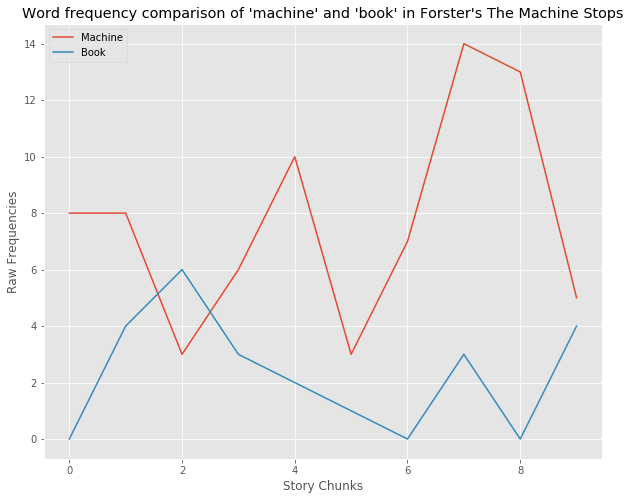

In [40]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('ggplot')
segments = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(10,8))
plt.plot(machine)
plt.plot(book)
plt.xlabel('Story Chunks')
plt.ylabel("Raw Frequencies")
plt.title("Word frequency comparison of 'machine' and 'book' in Forster's The Machine Stops")
plt.legend(['Machine', 'Book'], loc='upper left')
plt.show()

### Task

Now choose some other pairs of words and copy the code above into some new cells to create new plots below. Can you find other interesting patterns?

### Dispersion plots

Another great took NLTK provides is a dispersion plot. This can be created from an nltk.Text object, such as ```pos_filtered_text``` which we created earlier.

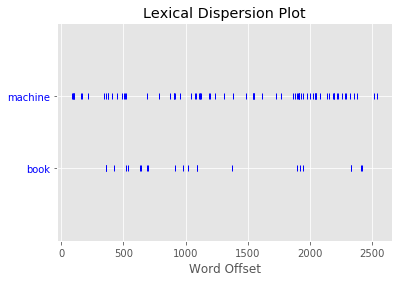

In [41]:
pos_filtered_text.dispersion_plot(['machine', 'book'])

This gives us some of the same information as the line plot, but of course it doesn't let us see the 'overlap' where the frequency of the word machine dips below that of the word book.

### Task

Try creating a dispersion plot of some pairs of words you compared earlier in the frequency plot. What information is visible in the lexical dispersion plot that is not visible in the frequency plot? Do you notice any patterns that you can relate back to the story?

We'll come back to explore more powerful features offered by NLTK a bit later. For now, we want to be able to count the words, plot frequencies and see dispersion plots of any words we're particularly interested in.

## Finishing up

Don't forget to save your notebook before closing your browser window. Note you can download your notebook file in a range of formats by going to File > Download as. This might be useful if you want to keep a record of the lab as a static document, or you want to print your work.